## Summary: a program that takes the style from animal crossing and applus it to a doom picture, I will load a pre trained style transfer model from tensorflow hub.

/kaggle/input/doom-crossing/doom_crossing_dataset.csv
/kaggle/input/doom-crossing/animal_crossing_dataset.csv
/kaggle/input/doom-crossing/doom/obs4q0yb7op41.png
/kaggle/input/doom-crossing/doom/qwx6uvpxfzy41.png
/kaggle/input/doom-crossing/doom/5c0apvkrr3c41.png
/kaggle/input/doom-crossing/doom/kickcy7tt7t41.jpg
/kaggle/input/doom-crossing/doom/qdmiw5cfd5y41.png
/kaggle/input/doom-crossing/doom/mvc68pct7nk41.png
/kaggle/input/doom-crossing/doom/e1a2dkzwh5w41.jpg
/kaggle/input/doom-crossing/doom/qisy4hvhk0q41.jpg
/kaggle/input/doom-crossing/doom/6ijl2n0tt1c21.jpg
/kaggle/input/doom-crossing/doom/0i7z32his4251.jpg
/kaggle/input/doom-crossing/doom/1gy9hfyzkmp31.jpg
/kaggle/input/doom-crossing/doom/6iu55lbl3pj41.jpg
/kaggle/input/doom-crossing/doom/xpl2xw612jp41.jpg
/kaggle/input/doom-crossing/doom/pjib5tvoyqc41.png
/kaggle/input/doom-crossing/doom/9jnzs825cem21.jpg
/kaggle/input/doom-crossing/doom/ekmkzznqogo41.jpg
/kaggle/input/doom-crossing/doom/unqa1b2rl5y21.jpg
/kaggle/input/doom-cros

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools

### Get the Images

In [4]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [5]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

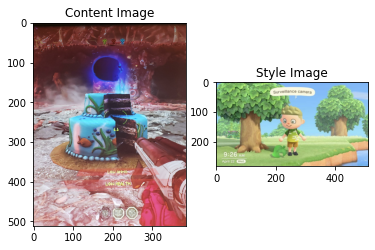

In [6]:
content_image = load_img('/kaggle/input/doom-crossing/doom/lzre9qnqo2q41.jpg')
style_image = load_img('/kaggle/input/doom-crossing/animal_crossing/kzabkt8igdu41.jpg')

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [7]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

### Pre trained tensorflow model

#### DOOM -> animal crossing

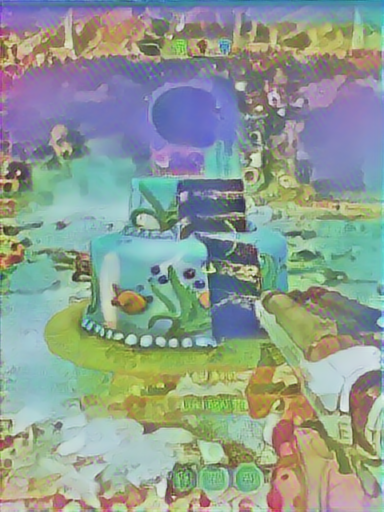

In [8]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

#### Animal crossing -> DOOM

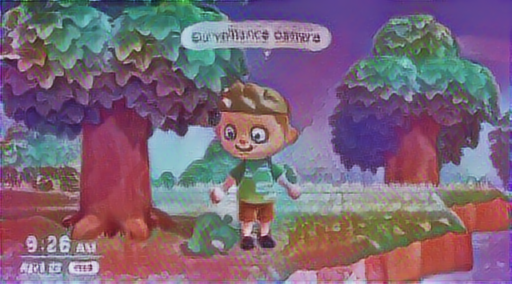

In [9]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(style_image), tf.constant(content_image))[0]
tensor_to_image(stylized_image)